# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from statsmodels.tsa.stattools import adfuller

# Combining all dataset of all months

In [3]:
df_april = pd.read_csv(r'C:\Users\ADMIN\Python\Ml projects\Uber Analysis\Dataset\uber-raw-data-apr14.csv')
df_may = pd.read_csv(r'C:\Users\ADMIN\Python\Ml projects\Uber Analysis\Dataset\uber-raw-data-may14.csv')
df_june = pd.read_csv(r'C:\Users\ADMIN\Python\Ml projects\Uber Analysis\Dataset\uber-raw-data-jun14.csv')
df_july = pd.read_csv(r'C:\Users\ADMIN\Python\Ml projects\Uber Analysis\Dataset\uber-raw-data-jul14.csv')
df_aug = pd.read_csv(r'C:\Users\ADMIN\Python\Ml projects\Uber Analysis\Dataset\uber-raw-data-aug14.csv')
df_sept = pd.read_csv(r'C:\Users\ADMIN\Python\Ml projects\Uber Analysis\Dataset\uber-raw-data-sep14.csv')

# Concatenating Files Apr-Sept, 2014
df_aprsept_2014 = pd.DataFrame()
df_aprsept_2014 = df_aprsept_2014.append(df_april)
df_aprsept_2014 = df_aprsept_2014.append(df_may)
df_aprsept_2014 = df_aprsept_2014.append(df_june)
df_aprsept_2014 = df_aprsept_2014.append(df_july)
df_aprsept_2014 = df_aprsept_2014.append(df_aug)
uber_data = df_aprsept_2014.append(df_sept)

# Preprocessing and Feature engineering 

In [4]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.day_name()
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour

In [5]:
uber_data.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,0


# Visualization on a Journeys by Days of week

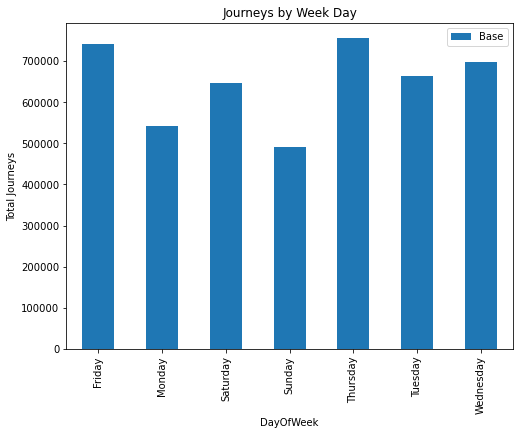

In [12]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day');

# Visualization on a Journeys in a Month

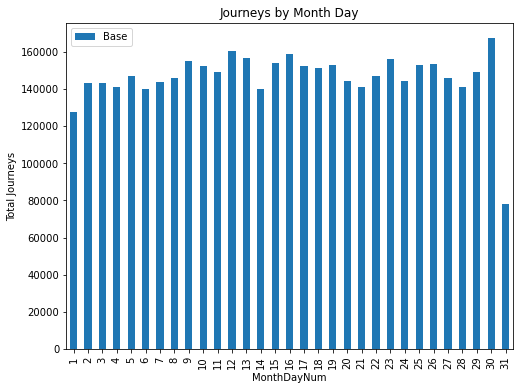

In [7]:
uber_monthdays = uber_data.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day');

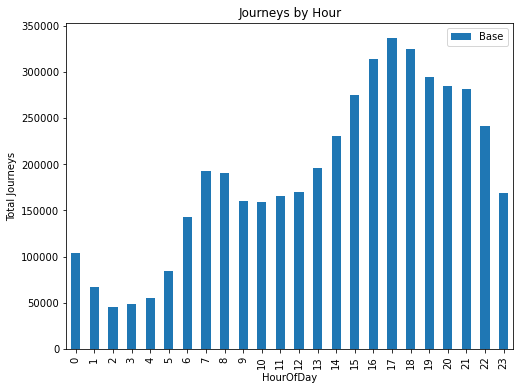

In [8]:
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');

# Visualization on a Map

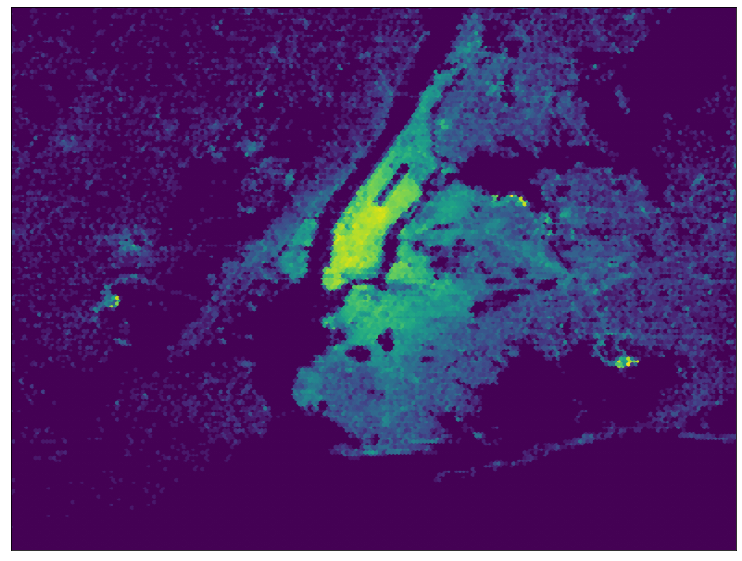

In [9]:
west, south, east, north = -74.26, 40.50, -73.70, 40.92

fig = plt.figure(figsize=(14,10))

m = Basemap(projection='cyl', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(uber_data['Lon'].values, uber_data['Lat'].values)
m.hexbin(x, y, gridsize=1000,
         bins='log',edgecolors='face');

# Visualization of Journeys by Month by Dispatch Base 

Text(0.5, 1.0, 'Journeys by Month by Dispatch Base')

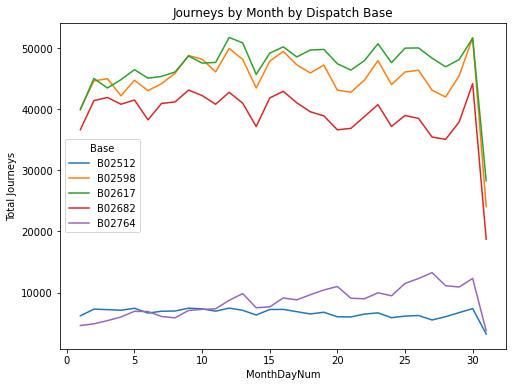

In [11]:
uber_data.groupby(['Base','MonthDayNum']).count().unstack('Base')['Date/Time'].plot(figsize = (8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month by Dispatch Base')